In [118]:
!pip3 install seaborn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv', header = None)

# Extract the header from the first row and create a list of attributes names
attribute_names = df.iloc[0].tolist()
df.columns = attribute_names
# Create a DataFrame from the remaining rows (excluding the first one)
df = df[1:]


# Convert specific columns to numeric
columns_to_convert = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts', 'IsActiveMember', 'HasCrCard', 'Exited']
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Split the data assuming the last column is the target variable
X = df.iloc[:, :-1]   # All columns except the last one
Y = df.iloc[:, -1]    # The last column is the target

print('X:', X.shape)
print('Y:', Y.shape)

# Removing the redundant and focusing on relevant features
X = X.drop(X.columns[:3], axis=1)

X: (10000, 13)
Y: (10000,)


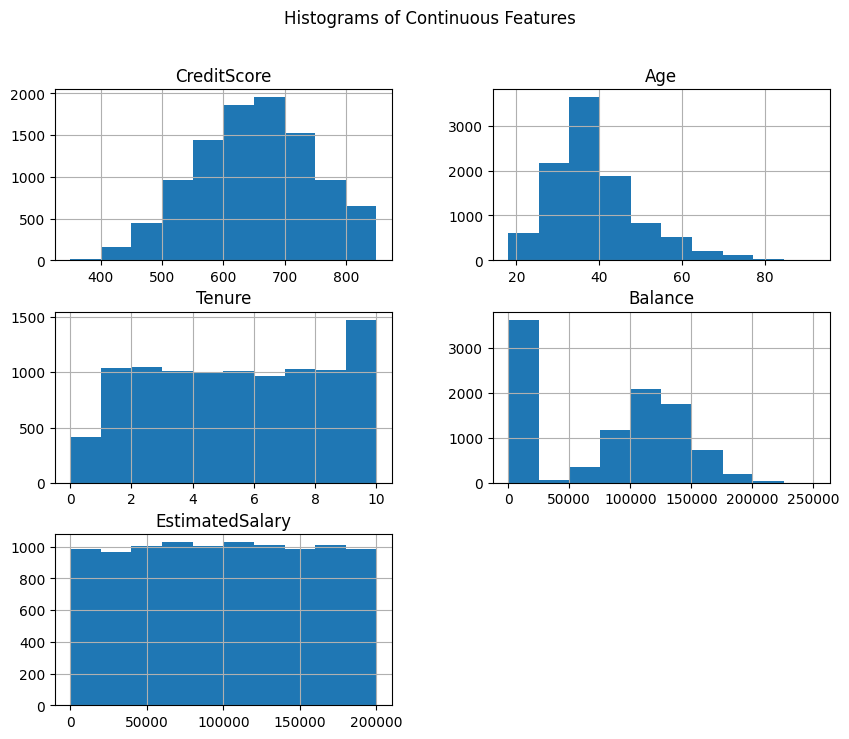

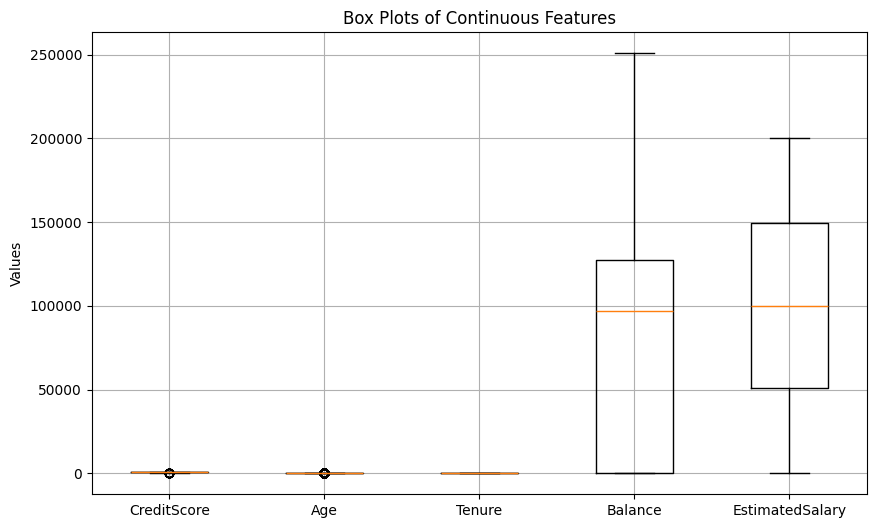

In [41]:
# Explore the Data
# Define continuous columns
continuous_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Plot histograms for continuous features
X[continuous_columns].hist(figsize=(10, 8))
plt.suptitle('Histograms of Continuous Features')
plt.show()


# Box Plot for each continuous variable
plt.figure(figsize=(10, 6))
plt.boxplot([X[col] for col in continuous_columns], tick_labels=continuous_columns)  # Using 'tick_labels'
plt.title('Box Plots of Continuous Features')
plt.ylabel('Values')
plt.grid(True)

# Show the plot
plt.show()

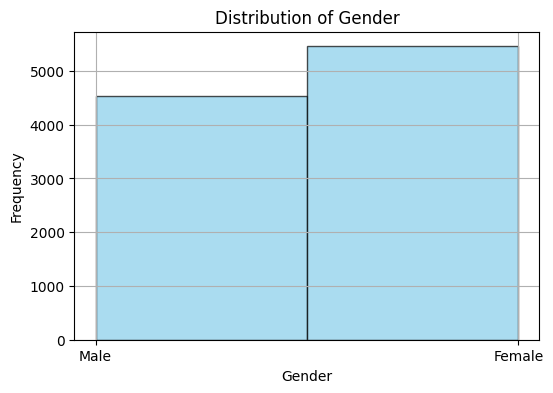

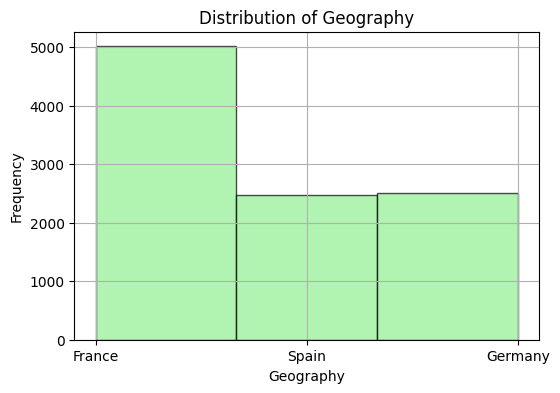

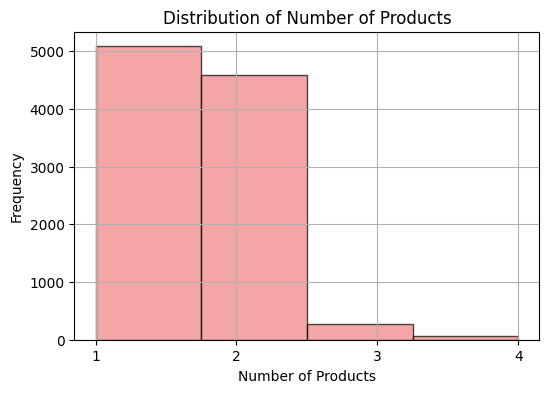

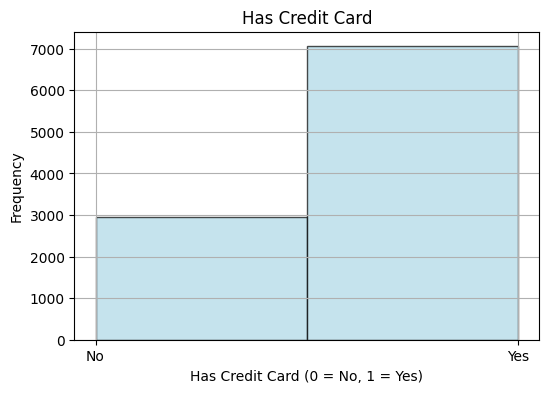

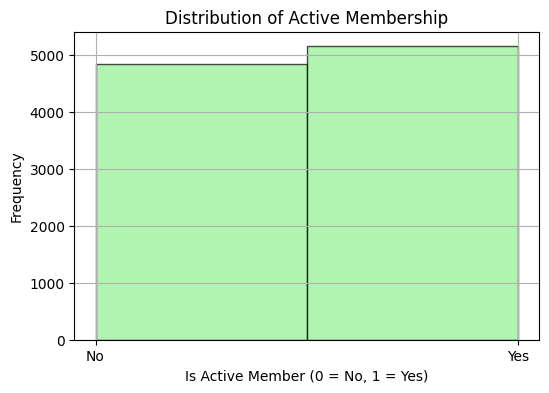

In [38]:
# Create a histogram for Gender
plt.figure(figsize=(6, 4))
plt.hist(X['Gender'], bins=2, edgecolor='black', alpha=0.7, color='skyblue')  # Use a single color
plt.xticks([0, 1], ['Male', 'Female'])  # Set labels for 0 as Male and 1 as Female
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

# Create a histogram for Geography (assume values are 'Spain', 'France', 'Germany')
plt.figure(figsize=(6, 4))
plt.hist(X['Geography'], bins=3, edgecolor='black', alpha=0.7, color='lightgreen')  # Single Geography column
plt.title('Distribution of Geography')
plt.xlabel('Geography')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

# Histogram for NumOfProducts
plt.figure(figsize=(6, 4))
plt.hist(X['NumOfProducts'], bins=4, edgecolor='black', alpha=0.7, color='lightcoral')
plt.title('Distribution of Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4])  # Set ticks for each product category
plt.grid(True)

# Show the plot
plt.show()

# Histogram for HasCrCard
plt.figure(figsize=(6, 4))
plt.hist(X['HasCrCard'], bins=2, edgecolor='black', alpha=0.7, color='lightblue')
plt.title('Has Credit Card')
plt.xlabel('Has Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])  # Set labels for 0 as No and 1 as Yes
plt.grid(True)

# Show the plot
plt.show()

# Histogram for IsActiveMember
plt.figure(figsize=(6, 4))
plt.hist(X['IsActiveMember'], bins=2, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Distribution of Active Membership')
plt.xlabel('Is Active Member (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])  # Set labels for 0 as No and 1 as Yes
plt.grid(True)

# Show the plot
plt.show()

In [106]:
# Handle Missing Data
# Checking for missing values
missing_values_X = X.isnull().sum()
print("Missing values in each column of X:", missing_values_X[missing_values_X > 0])

# Checking for missing values in Y
missing_values_Y = Y.isnull().sum()
print("Missing values in Y column:", missing_values_Y[missing_values_Y > 0])

Missing values in each column of X: Series([], dtype: int64)
Missing values in Y column: []


In [95]:
# Label Encoding for Gender: 'Male' -> 1, 'Female' -> 0 
X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0}) 

# One-Hot Encoding for Geography, generating Geography_Germany and Geography_Spain 
X = pd.get_dummies(X, columns=['Geography']) 

# Convert boolean columns (True/False) to integers (1/0) for one-hot encoded columns 
X['Geography_Germany'] = X['Geography_Germany'].astype(int) 
X['Geography_Spain'] = X['Geography_Spain'].astype(int) 
X['Geography_France'] = X['Geography_France'].astype(int) 

# Check the result 
print(X) 

       CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
1              619       0   42       2       0.00              1          1   
2              608       0   41       1   83807.86              1          0   
3              502       0   42       8  159660.80              3          1   
4              699       0   39       1       0.00              2          0   
5              850       0   43       2  125510.82              1          1   
...            ...     ...  ...     ...        ...            ...        ...   
9996           771       1   39       5       0.00              2          1   
9997           516       1   35      10   57369.61              1          1   
9998           709       0   36       7       0.00              1          0   
9999           772       1   42       3   75075.31              2          1   
10000          792       0   28       4  130142.79              1          1   

       IsActiveMember  EstimatedSalary 

In [108]:
# Feature Scaling
# Standardizing manually (scaling to mean 0, std 1)
X['Balance'] = (X['Balance'] - X['Balance'].mean()) / X['Balance'].std()  # Standardizing 'Balance'
X['Tenure'] = (X['Tenure'] - X['Tenure'].mean()) / X['Tenure'].std()  # Standardizing 'Tenure'
X['EstimatedSalary'] = (X['EstimatedSalary'] - X['EstimatedSalary'].mean()) / X['EstimatedSalary'].std()  # Standardizing 'EstimatedSalary'
X['CreditScore'] = (X['CreditScore'] - X['CreditScore'].mean()) / X['CreditScore'].std()  # Standardizing 'CreditScore'

# Display the standardized columns
print(X[['Balance', 'Tenure', 'EstimatedSalary', 'CreditScore']].head())

    Balance    Tenure  EstimatedSalary  CreditScore
1 -1.225786 -1.041708         0.021885    -0.326205
2  0.117344 -1.387468         0.216523    -0.440014
3  1.332987  1.032856         0.240675    -1.536717
4 -1.225786 -1.387468        -0.108912     0.501496
5  0.785689 -1.041708        -0.365258     2.063781


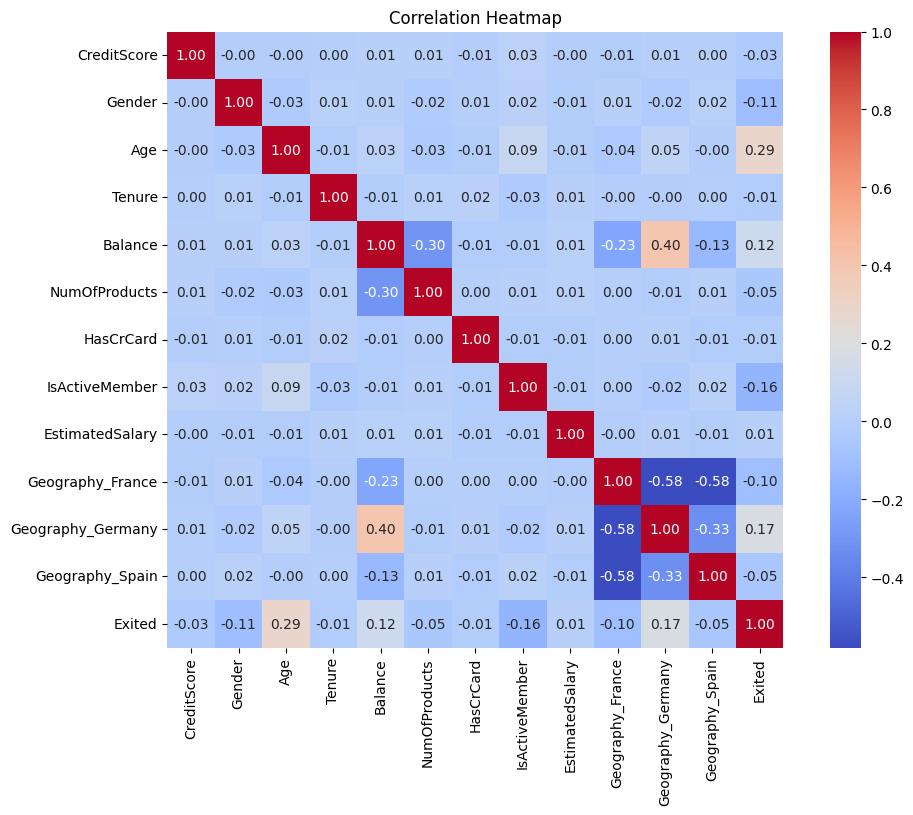

In [124]:
import seaborn as sns

# If 'Exited' is not already part of X, you can add it as follows:
X['Exited'] = Y
# Calculate the correlation matrix
correlation_matrix = X.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

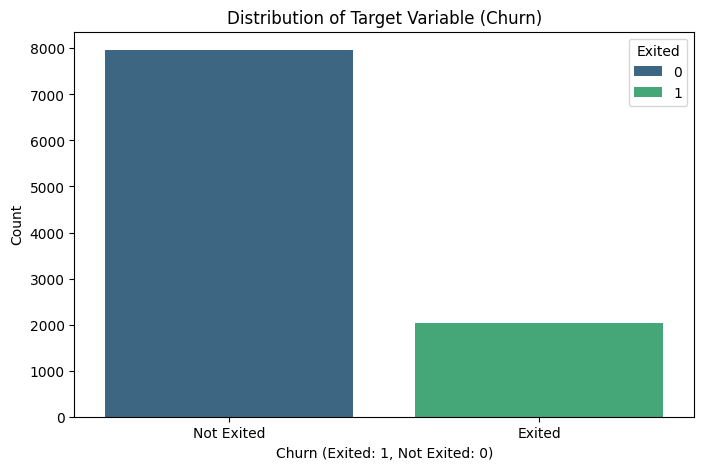

In [129]:
# Set figure size
plt.figure(figsize=(8, 5))

# Use hue to map the Exited variable while counting
sns.countplot(data=X, x='Exited', hue='Exited', palette='viridis', dodge=False)

# Set title and labels
plt.title('Distribution of Target Variable (Churn)')
plt.xlabel('Churn (Exited: 1, Not Exited: 0)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Exited', 'Exited'])

# Display the plot
plt.show()